## Project Description

### Import all required libraries

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [3]:
df=pd.read_csv('loan.csv')

In [204]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [4]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [214]:
df['bad_loan'].value_counts()

0    133971
1     30016
Name: bad_loan, dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [225]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [226]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [240]:
term=[]
for i in df['term']:
    term.append(int(i[0:2]))
print(term)

[36, 60, 36, 36, 36, 36, 60, 60, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 60, 36, 36, 36, 60, 36, 60, 36, 60, 36, 60, 36, 60, 36, 36, 36, 36, 36, 36, 60, 36, 60, 60, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 60, 36, 36, 60, 60, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 60, 60, 36, 60, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 60, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 60, 36, 36, 36, 36, 36, 36, 36, 36, 60, 36, 60, 36, 36, 60, 36,

In [241]:
term=pd.DataFrame(term,columns=['term'])

In [242]:
term

,term
0,36
1,60
2,36
3,36
4,36
...,...
163982,60
163983,36
163984,36
163985,60


In [243]:
df1.drop('term',axis=1,inplace=True)

In [244]:
df1.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [247]:
df1=pd.concat([df1,term],axis=1)

In [249]:
df1.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,term
0,5000,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,36
1,2500,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,60
2,2400,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,36
3,10000,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified,36
4,5000,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified,36


In [250]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   home_ownership         163987 non-null  object 
 4   annual_inc             163983 non-null  float64
 5   purpose                163987 non-null  object 
 6   addr_state             163987 non-null  object 
 7   dti                    163987 non-null  float64
 8   delinq_2yrs            163958 non-null  float64
 9   revol_util             163794 non-null  float64
 10  total_acc              163958 non-null  float64
 11  bad_loan               163987 non-null  int64  
 12  longest_credit_length  163958 non-null  float64
 13  verification_status    163987 non-null  object 
 14  term                   163987 non-nu

In [251]:
df1['home_ownership'].isnull().sum()

0

In [252]:
df2=pd.get_dummies(df['home_ownership'],drop_first=True)

In [253]:
df2.head()

,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [254]:
df2.tail()

,MORTGAGE,NONE,OTHER,OWN,RENT
163982,1,0,0,0,0
163983,0,0,0,1,0
163984,1,0,0,0,0
163985,0,0,0,0,1
163986,1,0,0,0,0


In [255]:
df1=pd.concat([df1,df2],axis=1)

In [256]:
df1.drop('home_ownership',axis=1,inplace=True)

In [257]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   purpose                163987 non-null  object 
 5   addr_state             163987 non-null  object 
 6   dti                    163987 non-null  float64
 7   delinq_2yrs            163958 non-null  float64
 8   revol_util             163794 non-null  float64
 9   total_acc              163958 non-null  float64
 10  bad_loan               163987 non-null  int64  
 11  longest_credit_length  163958 non-null  float64
 12  verification_status    163987 non-null  object 
 13  term                   163987 non-null  int64  
 14  MORTGAGE               163987 non-nu

In [258]:
df1['purpose'].isnull().sum()

0

In [259]:
purpose_dummies=pd.get_dummies(df1['purpose'],drop_first=True)

In [260]:
purpose_dummies

,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,1,0,0,0,0,0,0,0,0,0,0,0,0
163983,0,0,0,1,0,0,0,0,0,0,0,0,0
163984,0,1,0,0,0,0,0,0,0,0,0,0,0
163985,1,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
df1=pd.concat([df1,purpose_dummies],axis=1)

In [262]:
df1.drop('purpose',axis=1,inplace=True)

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   addr_state             163987 non-null  object 
 5   dti                    163987 non-null  float64
 6   delinq_2yrs            163958 non-null  float64
 7   revol_util             163794 non-null  float64
 8   total_acc              163958 non-null  float64
 9   bad_loan               163987 non-null  int64  
 10  longest_credit_length  163958 non-null  float64
 11  verification_status    163987 non-null  object 
 12  term                   163987 non-null  int64  
 13  MORTGAGE               163987 non-null  uint8  
 14  NONE                   163987 non-nu

In [264]:
df1['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY',
       'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'WA',
       'WI', 'AL', 'NV', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC', 'SD', 'NC',
       'AR', 'KS', 'NM', 'HI', 'AK', 'OK', 'MT', 'WY', 'NH', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [265]:
df1.drop('addr_state',axis=1,inplace=True)

In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   dti                    163987 non-null  float64
 5   delinq_2yrs            163958 non-null  float64
 6   revol_util             163794 non-null  float64
 7   total_acc              163958 non-null  float64
 8   bad_loan               163987 non-null  int64  
 9   longest_credit_length  163958 non-null  float64
 10  verification_status    163987 non-null  object 
 11  term                   163987 non-null  int64  
 12  MORTGAGE               163987 non-null  uint8  
 13  NONE                   163987 non-null  uint8  
 14  OTHER                  163987 non-nu

In [267]:
df1['verification_status'].unique()

array(['verified', 'not verified'], dtype=object)

In [268]:
veri=pd.get_dummies(df1['verification_status'],drop_first=True)

In [269]:
veri

,verified
0,1
1,1
2,0
3,1
4,1
...,...
163982,0
163983,1
163984,0
163985,1


In [270]:
df1=pd.concat([df1,veri],axis=1)

In [271]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   dti                    163987 non-null  float64
 5   delinq_2yrs            163958 non-null  float64
 6   revol_util             163794 non-null  float64
 7   total_acc              163958 non-null  float64
 8   bad_loan               163987 non-null  int64  
 9   longest_credit_length  163958 non-null  float64
 10  verification_status    163987 non-null  object 
 11  term                   163987 non-null  int64  
 12  MORTGAGE               163987 non-null  uint8  
 13  NONE                   163987 non-null  uint8  
 14  OTHER                  163987 non-nu

In [272]:
df1.drop('verification_status',axis=1,inplace=True)

In [273]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   dti                    163987 non-null  float64
 5   delinq_2yrs            163958 non-null  float64
 6   revol_util             163794 non-null  float64
 7   total_acc              163958 non-null  float64
 8   bad_loan               163987 non-null  int64  
 9   longest_credit_length  163958 non-null  float64
 10  term                   163987 non-null  int64  
 11  MORTGAGE               163987 non-null  uint8  
 12  NONE                   163987 non-null  uint8  
 13  OTHER                  163987 non-null  uint8  
 14  OWN                    163987 non-nu

In [274]:
df1.isnull().sum()

loan_amnt                   0
int_rate                    0
emp_length               5804
annual_inc                  4
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
term                        0
MORTGAGE                    0
NONE                        0
OTHER                       0
OWN                         0
RENT                        0
credit_card                 0
debt_consolidation          0
educational                 0
home_improvement            0
house                       0
major_purchase              0
medical                     0
moving                      0
other                       0
renewable_energy            0
small_business              0
vacation                    0
wedding                     0
verified                    0
dtype: int64

In [275]:
df1['loan_amnt'].unique()

array([ 5000,  2500,  2400, ..., 26525, 29150, 26875], dtype=int64)

In [276]:
df1.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified
0,5000,10.65,10.0,24000.0,27.65,0.0,83.7,9.0,0,26.0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,0.0,30000.0,1.00,0.0,9.4,4.0,1,12.0,...,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,10.0,12252.0,8.72,0.0,98.5,10.0,0,10.0,...,0,0,0,0,0,0,1,0,0,0
3,10000,13.49,10.0,49200.0,20.00,0.0,21.0,37.0,0,15.0,...,0,0,0,0,1,0,0,0,0,1
4,5000,7.90,3.0,36000.0,11.20,0.0,28.3,12.0,0,7.0,...,0,0,0,0,0,0,0,0,1,1


In [277]:
df1['revol_util'].unique()

array([ 83.7,   9.4,  98.5, ..., 111.3, 113. , 114.5])

In [278]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             158183 non-null  float64
 3   annual_inc             163983 non-null  float64
 4   dti                    163987 non-null  float64
 5   delinq_2yrs            163958 non-null  float64
 6   revol_util             163794 non-null  float64
 7   total_acc              163958 non-null  float64
 8   bad_loan               163987 non-null  int64  
 9   longest_credit_length  163958 non-null  float64
 10  term                   163987 non-null  int64  
 11  MORTGAGE               163987 non-null  uint8  
 12  NONE                   163987 non-null  uint8  
 13  OTHER                  163987 non-null  uint8  
 14  OWN                    163987 non-nu

In [279]:
df1['emp_length'].fillna(df1['emp_length'].mean(),inplace=True)

In [280]:
df1.isnull().sum()

loan_amnt                  0
int_rate                   0
emp_length                 0
annual_inc                 4
dti                        0
delinq_2yrs               29
revol_util               193
total_acc                 29
bad_loan                   0
longest_credit_length     29
term                       0
MORTGAGE                   0
NONE                       0
OTHER                      0
OWN                        0
RENT                       0
credit_card                0
debt_consolidation         0
educational                0
home_improvement           0
house                      0
major_purchase             0
medical                    0
moving                     0
other                      0
renewable_energy           0
small_business             0
vacation                   0
wedding                    0
verified                   0
dtype: int64

In [281]:
df1['annual_inc'].fillna(df1['annual_inc'].mean(),inplace=True)

In [282]:
df1['delinq_2yrs'].fillna(df1['delinq_2yrs'].mean(),inplace=True)

In [283]:
df1['revol_util'].fillna(df1['revol_util'].mean(),inplace=True)
df1['total_acc'].fillna(df1['total_acc'].mean(),inplace=True)
df1['longest_credit_length'].fillna(df1['longest_credit_length'].mean(),inplace=True)

In [284]:
df1.isnull().sum()

loan_amnt                0
int_rate                 0
emp_length               0
annual_inc               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
term                     0
MORTGAGE                 0
NONE                     0
OTHER                    0
OWN                      0
RENT                     0
credit_card              0
debt_consolidation       0
educational              0
home_improvement         0
house                    0
major_purchase           0
medical                  0
moving                   0
other                    0
renewable_energy         0
small_business           0
vacation                 0
wedding                  0
verified                 0
dtype: int64

In [285]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             163987 non-null  float64
 3   annual_inc             163987 non-null  float64
 4   dti                    163987 non-null  float64
 5   delinq_2yrs            163987 non-null  float64
 6   revol_util             163987 non-null  float64
 7   total_acc              163987 non-null  float64
 8   bad_loan               163987 non-null  int64  
 9   longest_credit_length  163987 non-null  float64
 10  term                   163987 non-null  int64  
 11  MORTGAGE               163987 non-null  uint8  
 12  NONE                   163987 non-null  uint8  
 13  OTHER                  163987 non-null  uint8  
 14  OWN                    163987 non-nu

In [286]:
df1.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan',
       'longest_credit_length', 'term', 'MORTGAGE', 'NONE', 'OTHER', 'OWN',
       'RENT', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'verified'],
      dtype='object')

In [287]:
df1.corr()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified
loan_amnt,1.000000,0.237194,0.128698,0.322187,0.064353,0.007506,0.101911,0.239046,0.058686,0.186567,...,0.021557,-0.077163,-0.064795,-0.069412,-0.133422,-0.016677,0.031484,-0.075838,-0.035840,0.351040
int_rate,0.237194,1.000000,0.042944,-0.005979,0.178344,0.109530,0.372906,0.004484,0.231142,-0.055193,...,0.007854,-0.069316,0.014101,0.018652,0.052322,-0.001741,0.034327,0.000126,-0.010681,0.223421
emp_length,0.128698,0.042944,1.000000,0.081342,0.060836,0.031472,0.048570,0.154649,0.001084,0.247495,...,-0.012880,-0.028551,-0.004391,-0.041512,-0.021860,0.001901,-0.029819,0.006268,-0.042407,0.065425
annual_inc,0.322187,-0.005979,0.081342,1.000000,-0.164857,0.052126,0.019116,0.216290,-0.060918,0.165478,...,0.011315,0.000814,-0.000131,-0.010479,-0.019418,0.005843,0.025262,-0.009706,-0.002989,0.115772
dti,0.064353,0.178344,0.060836,-0.164857,1.000000,-0.001143,0.239737,0.242035,0.105533,0.056775,...,-0.045299,-0.084530,-0.023102,-0.025911,-0.055333,-0.008916,-0.071029,-0.012244,-0.033618,0.106667
delinq_2yrs,0.007506,0.109530,0.031472,0.052126,-0.001143,1.000000,-0.016902,0.125677,0.013071,0.097143,...,0.001613,-0.003607,0.008003,-0.000733,0.002331,-0.002281,0.001959,-0.001206,-0.001547,0.021930
revol_util,0.101911,0.372906,0.048570,0.019116,0.239737,-0.016902,1.000000,-0.074027,0.105232,-0.008143,...,-0.058693,-0.107054,-0.029571,-0.017867,-0.050610,-0.007143,-0.065854,-0.023684,-0.036529,0.061918
total_acc,0.239046,0.004484,0.154649,0.216290,0.242035,0.125677,-0.074027,1.000000,-0.041141,0.341134,...,-0.010292,-0.044763,-0.013046,-0.031569,-0.061862,-0.003544,-0.031968,-0.013954,-0.040035,0.117349
bad_loan,0.058686,0.231142,0.001084,-0.060918,0.105533,0.013071,0.105232,-0.041141,1.000000,-0.024094,...,-0.000160,-0.020323,0.005794,0.006041,0.021172,0.003977,0.050460,-0.000892,-0.010203,0.061299
longest_credit_length,0.186567,-0.055193,0.247495,0.165478,0.056775,0.097143,-0.008143,0.341134,-0.024094,1.000000,...,-0.014376,-0.031870,0.000871,-0.030073,-0.027031,0.001842,-0.016722,-0.009171,-0.046809,0.112423


<AxesSubplot:>

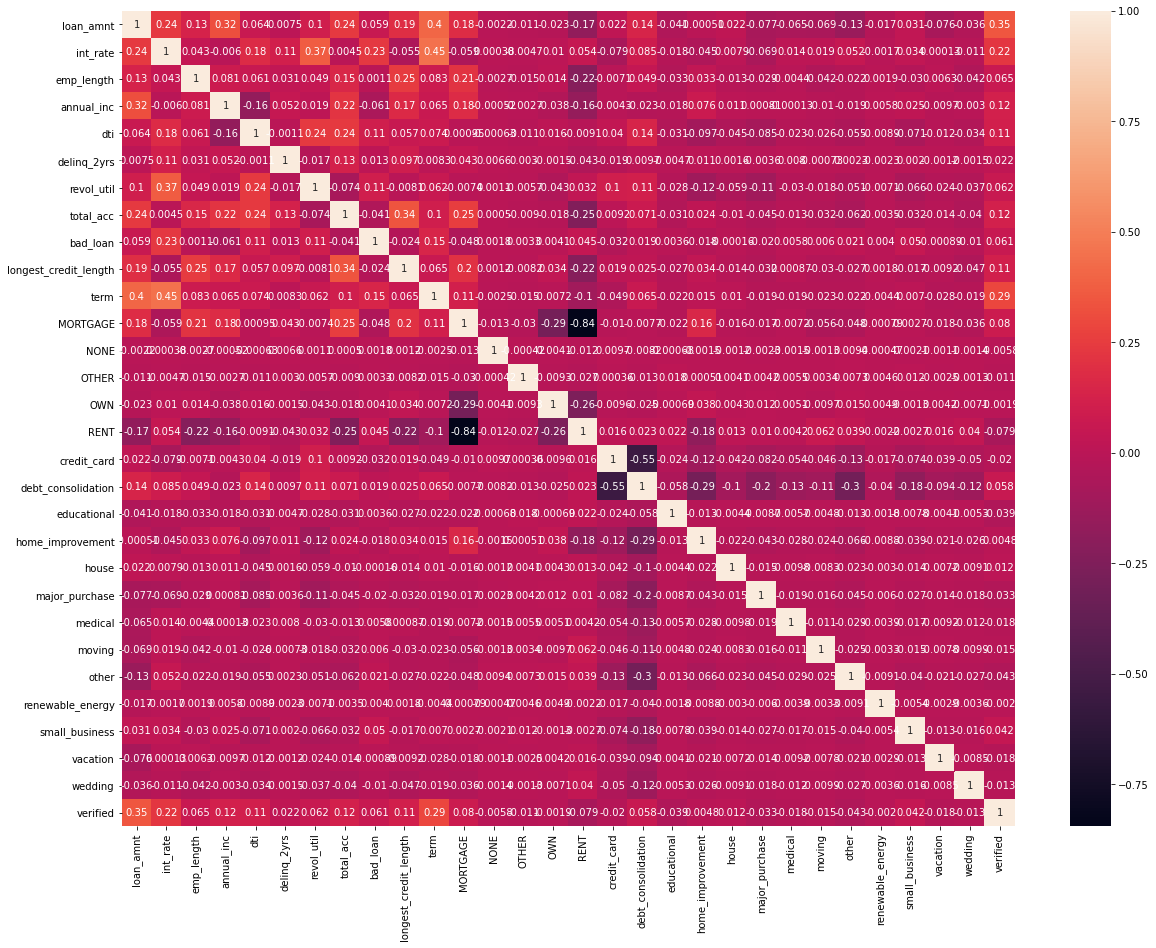

In [288]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

### Train test split on data

In [289]:
x=df1.drop('bad_loan',axis=1)
y=df1['bad_loan']

In [290]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### Random Forest model

In [290]:
rf_model=RandomForestClassifier()

In [291]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [292]:
y_pred_rf=rf_model.predict(x_test)

In [293]:
score_rf=accuracy_score(y_test,y_pred_rf)
score_rf

0.8185560095127752

In [294]:
matrix_rf=confusion_matrix(y_test,y_pred_rf)
matrix_rf

array([[26604,   248],
       [ 5703,   243]], dtype=int64)

#### DecisionTree Model

In [214]:
dt_model=DecisionTreeClassifier()

In [215]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [216]:
y_pred_dt=dt_model.predict(x_test)

In [217]:
score_dt=accuracy_score(y_test,y_pred_dt)
score_dt

0.7126654064272212

In [235]:
matrix_dt=confusion_matrix(y_test,y_pred_dt)
matrix_dt

array([[21814,  5038],
       [ 4386,  1560]], dtype=int64)

### Logistic Regression

In [260]:
lr_model=LogisticRegression()

In [219]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [220]:
y_pred_lr=lr_model.predict(x_test)

In [221]:
score_lr=accuracy_score(y_test,y_pred_lr)
score_lr

0.8186169888407829

In [234]:
matrix_lr=confusion_matrix(y_test,y_pred_lr)
matrix_lr

array([[26834,    18],
       [ 5931,    15]], dtype=int64)

## Top 25 Important Features

In [ ]:
imp_featutes=['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length',
       'terms', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'verified']

#### Random Forest model on best features

In [154]:
X=df1[['loan_amnt', 'int_rate','annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length',
       'terms', 'MORTGAGE','OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'wedding', 'verified']]
Y=df1['bad_loan']

In [155]:
X.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length,terms,MORTGAGE,...,educational,home_improvement,major_purchase,medical,moving,other,renewable_energy,small_business,wedding,verified
0,5000,10.65,24000.0,27.65,0.0,83.7,9.0,26.0,36,0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,30000.0,1.00,0.0,9.4,4.0,12.0,60,0,...,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,12252.0,8.72,0.0,98.5,10.0,10.0,36,0,...,0,0,0,0,0,0,0,1,0,0
3,10000,13.49,49200.0,20.00,0.0,21.0,37.0,15.0,36,0,...,0,0,0,0,0,1,0,0,0,1
4,5000,7.90,36000.0,11.20,0.0,28.3,12.0,7.0,36,0,...,0,0,0,0,0,0,0,0,1,1


In [156]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: bad_loan, dtype: int64

In [157]:
x_train_bf,x_test_bf,y_train_bf,y_test_bf=train_test_split(X,Y,test_size=0.2,random_state=1)

In [158]:
x_train_bf.shape

(131189, 25)

In [159]:
x_test_bf.shape

(32798, 25)

In [160]:
rf_model_bf=RandomForestClassifier()

In [161]:
rf_model_bf.fit(x_train_bf,y_train_bf)

RandomForestClassifier()

In [162]:
y_pred_rf_bf=rf_model_bf.predict(x_test_bf)
y_pred_rf_bf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
score_bf=accuracy_score(y_test_bf,y_pred_rf_bf)
score_bf

0.8186779681687908

In [233]:
matrix_rf_bf=confusion_matrix(y_test_bf,y_pred_rf_bf)
matrix_rf_bf

array([[26567,   285],
       [ 5662,   284]], dtype=int64)

#### Decision Tree Model on Best Features

In [222]:
dt_model_bf=DecisionTreeClassifier()

In [224]:
dt_model_bf.fit(x_train_bf,y_train_bf)

DecisionTreeClassifier()

In [225]:
y_pred_dt_bf=dt_model_bf.predict(x_test_bf)

In [226]:
score_dt_bf=accuracy_score(y_test_bf,y_pred_dt_bf)
score_dt_bf

0.7175742423318495

In [232]:
matrix_dt_bf=confusion_matrix(y_test_bf,y_pred_dt_bf)
matrix_dt_bf

array([[21901,  4951],
       [ 4312,  1634]], dtype=int64)

#### Logistic Regression on Best Features

In [227]:
lr_model_bf=LogisticRegression()

In [228]:
lr_model_bf.fit(x_train_bf,y_train_bf)

C:\Users\Shashree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [229]:
y_pred_lr_bf=lr_model_bf.predict(x_test_bf)

In [230]:
score_lr_bf=accuracy_score(y_test_bf,y_pred_lr_bf)
score_lr_bf

0.8185864991767791

In [231]:
matrix_lr_bf=confusion_matrix(y_test_bf,y_pred_lr_bf)
matrix_lr_bf

array([[26844,     8],
       [ 5942,     4]], dtype=int64)

##### Hyper Parameter Tunning of Random Forest

In [67]:
n_estimators=[int(x) for x in np.linspace(start=10, stop=100, num=10)]
criterion=['gini','entropy']
max_depth=[2,4,None]
bootstrap=[True,False]

In [68]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,'bootstrap':bootstrap}
param_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'criterion': ['gini', 'entropy'],
 'max_depth': [2, 4, None],
 'bootstrap': [True, False]}

In [69]:
rf_model=RandomForestClassifier()

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
rf_model_grid=RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid,cv=10,verbose=2,n_jobs=-1,random_state=1)

In [72]:
rf_model_grid

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=1, verbose=2)

In [164]:
rf_model_grid.fit(x_train_bf,y_train_bf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 45.2min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=1, verbose=2)

In [165]:
rf_model_grid.best_params_

{'n_estimators': 60,
 'max_depth': 2,
 'criterion': 'entropy',
 'bootstrap': False}

In [166]:
rf_model_grid.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       n_estimators=60)

In [167]:
### Best Model
best_rf_grid=rf_model_grid.best_estimator_

##### Check Accuracy on best model

In [168]:
y_pred_best=best_rf_grid.predict(x_test_bf)
y_pred_best

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
best_score=accuracy_score(y_test_bf,y_pred_best)
best_score

0.8187084578327947

In [177]:
r2_score_rf=r2_score(y_test_bf,y_pred_best)
r2_score_rf

-0.2214360196633398

In [178]:
matrix_rf=confusion_matrix(y_test_bf,y_pred_best)
matrix_rf

array([[26852,     0],
       [ 5946,     0]], dtype=int64)

#### Decision Tree Hyperparameter Tunning

In [239]:
criterion=["gini", "entropy"]
splitter=["best", "random"]
max_depth=[2,4,None]

In [240]:
parameter_grid_dt= {'criterion':criterion,'splitter':splitter,'max_depth':max_depth}
parameter_grid_dt

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 4, None]}

In [242]:
dt_model_hyp=DecisionTreeClassifier()

In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [246]:
dt_model_grid=RandomizedSearchCV(estimator=dt_model_hyp,param_distributions=parameter_grid_dt,cv=10,verbose=2,n_jobs=-1,random_state=1)

In [247]:
dt_model_grid.fit(x_train_bf,y_train_bf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, None],
                                        'splitter': ['best', 'random']},
                   random_state=1, verbose=2)

In [248]:
dt_model_grid.best_estimator_

DecisionTreeClassifier(max_depth=2, splitter='random')

In [249]:
dt_model_grid.best_params_

{'splitter': 'random', 'max_depth': 2, 'criterion': 'gini'}

In [253]:
best_dt_grid=dt_model_grid.best_estimator_

In [254]:
y_pred_dt_hy=best_dt_grid.predict(x_test_bf)

In [255]:
score_dt_hy=accuracy_score(y_test_bf,y_pred_dt_hy)
score_dt_hy

0.8187084578327947

In [256]:
matrix_dt_hy=confusion_matrix(y_test_bf,y_pred_dt_hy)
matrix_dt_hy

array([[26852,     0],
       [ 5946,     0]], dtype=int64)

## Feature Scaling

In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
sc=StandardScaler()

In [307]:
x_train_sc_bf=sc.fit_transform(x_train_bf)
x_test_sc_bf=sc.fit_transform(x_test_bf)

In [304]:
x_train_bf.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length', 'terms', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'wedding',
       'verified'],
      dtype='object')

In [306]:
x_test_bf.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length', 'terms', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'wedding',
       'verified'],
      dtype='object')

In [308]:
x_train_sc_bf=pd.DataFrame(x_train_sc_bf,columns=['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length', 'terms', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'wedding',
       'verified'])
x_test_sc_bf=pd.DataFrame(x_test_sc_bf,columns=['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length', 'terms', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'wedding',
       'verified'])

In [309]:
x_train_sc_bf

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length,terms,MORTGAGE,...,educational,home_improvement,major_purchase,medical,moving,other,renewable_energy,small_business,wedding,verified
0,0.616065,-0.113585,0.974311,0.144400,-0.326966,1.115536,1.403949,0.455550,-0.511091,1.027805,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,0.751961
1,2.116195,1.632824,0.219802,-0.757463,-0.326966,1.265860,0.206800,-0.552905,1.956597,-0.972947,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,3.821614,-0.034944,-0.155415,-0.103446,0.751961
2,-0.759054,-0.052108,-0.719142,0.147037,-0.326966,1.210477,-1.075859,-0.264775,-0.511091,-0.972947,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,-1.329856
3,-0.759054,1.145560,-0.199369,0.224829,-0.326966,1.250037,-0.562795,-1.129165,-0.511091,1.027805,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,-1.329856
4,2.741249,1.976641,0.353937,0.429199,-0.326966,-0.055413,1.660481,0.023355,1.956597,1.027805,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,0.751961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131184,0.741076,1.213868,-0.484406,1.477416,-0.326966,0.134470,0.292311,0.023355,-0.511091,1.027805,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,0.751961
131185,-1.509118,-0.011123,-0.367038,-0.305213,-0.326966,-0.814948,-0.477285,-1.417295,-0.511091,-0.972947,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,0.751961
131186,-1.259097,0.430602,0.303637,0.915730,-0.326966,-0.015854,1.489459,0.023355,-0.511091,1.027805,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,-0.261670,-0.034944,-0.155415,-0.103446,-1.329856
131187,-0.434025,-1.324915,-0.199369,0.615109,-0.326966,1.443876,-0.477285,1.031810,-0.511091,-0.972947,...,-0.049988,-0.252964,-0.172432,-0.112583,-0.095717,3.821614,-0.034944,-0.155415,-0.103446,-1.329856


In [310]:
x_test_sc_bf

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length,terms,MORTGAGE,...,educational,home_improvement,major_purchase,medical,moving,other,renewable_energy,small_business,wedding,verified
0,0.616880,0.178930,-0.211817,1.348766,-0.329971,0.832390,0.466186,0.154980,1.943417,1.029774,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,0.748101
1,2.247919,1.369694,0.687230,-0.520780,-0.329971,0.828427,-0.306831,0.728884,-0.514557,-0.971087,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,0.748101
2,-0.963973,-0.674868,-0.740668,-0.358955,-0.329971,0.669931,-0.736285,-1.279779,-0.514557,1.029774,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,-1.336717
3,-1.064345,0.178930,-0.405729,0.892233,-0.329971,0.638232,0.895640,-0.131972,-0.514557,-0.971087,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,-1.336717
4,-0.135907,0.588754,0.114308,-1.519363,-0.329971,0.582758,0.294405,1.015836,1.943417,1.029774,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,0.748101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32793,-0.135907,-0.897994,0.158379,0.159413,-0.329971,-0.764457,-0.306831,0.441932,-0.514557,-0.971087,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,0.748101
32794,-1.014159,-1.093798,-0.231208,-2.079832,1.127322,-2.139410,0.380296,1.446264,-0.514557,1.029774,...,-0.052747,3.943087,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,-1.336717
32795,1.369667,-1.321478,0.669601,1.073794,1.127322,-0.748608,1.067422,0.011504,-0.514557,1.029774,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,-0.152665,-0.105643,0.748101
32796,0.867809,-0.340179,-0.035533,0.346236,-0.329971,-1.671847,1.840439,1.733216,-0.514557,1.029774,...,-0.052747,-0.253608,-0.167781,-0.109272,-0.091616,-0.26055,-0.034058,6.550289,-0.105643,0.748101


## Decision Tree model on best Features and feature scaling

In [311]:
dt_model_bf_sc=DecisionTreeClassifier()

In [314]:
dt_model_bf_sc.fit(x_train_sc_bf,y_train_bf)

DecisionTreeClassifier()

In [316]:
y_pred_dt_bf_sc=dt_model_bf.predict(x_test_sc_bf)
y_pred_dt_bf_sc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [317]:
score_dt_bf_sc=accuracy_score(y_test_bf,y_pred_dt_bf_sc)
score_dt_bf_sc

0.8187084578327947

In [319]:
## Confusion Matrix
matrix_dt_bf_sc=confusion_matrix(y_test_bf,y_pred_dt_bf_sc)
matrix_dt_bf_sc

array([[26852,     0],
       [ 5946,     0]], dtype=int64)

### Working on Inbalance DataSet

#### 1) Under Sampling

### Random Forest

In [291]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Shashree\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 107119, 1: 24070})
The number of classes after fit Counter({0: 30087, 1: 24070})


In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
cls=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2, n_estimators=60)
cls.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       n_estimators=60)

In [293]:
y_pred_ns=cls.predict(x_test)

In [294]:
con_matrix_ns=confusion_matrix(y_test,y_pred_ns)
con_matrix_ns

array([[22407,  4445],
       [ 3990,  1956]], dtype=int64)

In [295]:
acc_score_ns=accuracy_score(y_test,y_pred_ns)             ## Before Tunning 60%
acc_score_ns

0.7428196841270809

In [296]:
report=classification_report(y_test,y_pred_ns)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     26852
           1       0.31      0.33      0.32      5946

    accuracy                           0.74     32798
   macro avg       0.58      0.58      0.58     32798
weighted avg       0.75      0.74      0.75     32798



#### OverSampling

In [297]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.85)
X_train_os,y_train_os=os.fit_sample(x_train,y_train)
print('Number of classes before fit {}'.format(Counter(y_train)))
print('Number of classes after fit {}'.format(Counter(y_train_os)))

C:\Users\Shashree\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.85 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Number of classes before fit Counter({0: 107119, 1: 24070})
Number of classes after fit Counter({0: 107119, 1: 91051})


In [298]:
from sklearn.ensemble import RandomForestClassifier
cls1=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2, n_estimators=60)
cls1.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       n_estimators=60)

In [299]:
y_pred_os=cls1.predict(x_test)

In [300]:
acc_score_os=accuracy_score(y_test,y_pred_os)                       # Before Tunning 81%
acc_score_os

0.7502591621440332

In [301]:
conf_matrix_os=confusion_matrix(y_test,y_pred_os)
conf_matrix_os

array([[22314,  4538],
       [ 3653,  2293]], dtype=int64)

In [302]:
class_report_os=classification_report(y_test,y_pred_os)
print(class_report_os)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     26852
           1       0.34      0.39      0.36      5946

    accuracy                           0.75     32798
   macro avg       0.60      0.61      0.60     32798
weighted avg       0.76      0.75      0.76     32798



#### SMOTETomek

#### Random Forest

In [303]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(0.75)
X_train_smt,y_train_smt=smt.fit_sample(x_train,y_train)
print('Number of classes before fit {}'.format(Counter(y_train)))
print('Number of classes after fit {}'.format(Counter (y_train_smt)))

C:\Users\Shashree\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Number of classes before fit Counter({0: 107119, 1: 24070})
Number of classes after fit Counter({0: 99989, 1: 73209})


In [304]:
RF_cls=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2, n_estimators=100)
RF_cls.fit(X_train_smt,y_train_smt)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2)

In [305]:
y_pred_smt=RF_cls.predict(x_test)

In [306]:
acc_score_smt=accuracy_score(y_test,y_pred_smt)                     # Before Tunning 81%
acc_score_smt

0.7995609488383438

In [307]:
rf_conf_matrix_smt=confusion_matrix(y_test,y_pred_smt)
rf_conf_matrix_smt

array([[25310,  1542],
       [ 5032,   914]], dtype=int64)

In [308]:
rf_clas_report_smt=classification_report(y_test,y_pred_smt)
print(rf_clas_report_smt)

              precision    recall  f1-score   support

           0       0.83      0.94      0.89     26852
           1       0.37      0.15      0.22      5946

    accuracy                           0.80     32798
   macro avg       0.60      0.55      0.55     32798
weighted avg       0.75      0.80      0.76     32798



### Decision Tree

In [115]:
# Under Sampling
from sklearn.tree import DecisionTreeClassifier


In [153]:
cls_dt_us=DecisionTreeClassifier(splitter= 'random', max_depth= 2, criterion= 'gini')
cls_dt_us.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=2, splitter='random')

In [154]:
y_pred_dt_us=cls_dt_us.predict(x_test)

In [155]:
dt_us_acc_score=accuracy_score(y_test,y_pred_dt_us)      ## Before Tunning accuracy was 50%
dt_us_acc_score

0.7048295627782182

In [156]:
dt_con_mat_us=confusion_matrix(y_test,y_pred_dt_us)
dt_con_mat_us

array([[20429,  6423],
       [ 3258,  2688]], dtype=int64)

In [158]:
## Over Sampling
cls_dt_os=DecisionTreeClassifier(splitter= 'random', max_depth= 2, criterion= 'gini')
cls_dt_os.fit(X_train_os,y_train_os)

DecisionTreeClassifier(max_depth=2, splitter='random')

In [159]:
y_pred_dt_os=cls_dt_os.predict(x_test)

In [160]:
dt_acc_score_os=accuracy_score(y_test,y_pred_dt_os)        ## Before Tunning accuracy was 71%    
dt_acc_score_os

0.730593328861516

In [161]:
dt_con_matrix_os=confusion_matrix(y_test,y_pred_dt_os)
dt_con_matrix_os

array([[21974,  4878],
       [ 3958,  1988]], dtype=int64)

In [162]:
dt_class_report_os=classification_report(y_test,y_pred_dt_os)
print(dt_class_report_os)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     26852
           1       0.29      0.33      0.31      5946

    accuracy                           0.73     32798
   macro avg       0.57      0.58      0.57     32798
weighted avg       0.75      0.73      0.74     32798



In [163]:
## SMOTETomek
cls_dt_smt=DecisionTreeClassifier(splitter= 'random', max_depth= 2, criterion= 'gini')
cls_dt_smt.fit(X_train_smt,y_train_smt)

DecisionTreeClassifier(max_depth=2, splitter='random')

In [164]:
dt_y_pred_smt=cls_dt_smt.predict(x_test)

In [166]:
acc_score_dt_smt=accuracy_score(y_test,dt_y_pred_smt)                  ## Before Tunning accuracy was 71% 
acc_score_dt_smt

0.740929324958839

In [167]:
con_matrix_dt_smt=confusion_matrix(y_test,dt_y_pred_smt)
con_matrix_dt_smt

array([[22323,  4529],
       [ 3968,  1978]], dtype=int64)

### Logistic Regression

In [132]:
# Under Sampling
from sklearn.linear_model import LogisticRegression
lr_cls3=LogisticRegression()

In [137]:
lr_cls3.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [138]:
y_pred_lr_us=lr_cls3.predict(x_test)

In [139]:
acc_score_lr_us=accuracy_score(y_test,y_pred_lr_us)
acc_score_lr_us

0.6755594853344716

In [140]:
conf_matrix_lr_us=confusion_matrix(y_test,y_pred_lr_us)

In [141]:
conf_matrix_lr_us

array([[19606,  7246],
       [ 3395,  2551]], dtype=int64)

In [142]:
# Over Sampling
lr_cls4_os=LogisticRegression()
lr_cls4_os.fit(X_train_os,y_train_os)

LogisticRegression()

In [143]:
y_pred_lr_os=lr_cls4_os.predict(x_test)

In [144]:
acc_score_lr_os=accuracy_score(y_test,y_pred_lr_os)
acc_score_lr_os

0.6326605280809805

In [145]:
conf_matrix_lr_os=confusion_matrix(y_test,y_pred_lr_os)
conf_matrix_lr_os

array([[17458,  9394],
       [ 2654,  3292]], dtype=int64)

In [146]:
# SMOTETomek
lr_cls_smt=LogisticRegression()

In [147]:
lr_cls_smt.fit(X_train_smt,y_train_smt)

C:\Users\Shashree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
y_pred_lr_smt=lr_cls_smt.predict(x_test)

In [149]:
acc_score_lr_smt=accuracy_score(y_test,y_pred_lr_smt)
acc_score_lr_smt

0.6824501493993537

In [150]:
conf_matrix_lr_smt=confusion_matrix(y_test,y_pred_lr_smt)
conf_matrix_lr_smt

array([[19479,  7373],
       [ 3042,  2904]], dtype=int64)

## Accuracy is Random Forest is Maximum hence saving Random Forest model for prediction

In [309]:
filename = 'Random_Forest.pkl'
pickle.dump(RF_cls, open(filename, 'wb'))